# DL_PJT : 리뷰에따른 약물 추천시스템

- 데이터
    - 'drugsComTrain_raw.csv'
    - 'drugsComTest_raw.csv'
- eda
    - data read
    - eda

## 1. data read

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import platform
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows")
    rc("font", family=font_name)
else:
    print("Unkown system")
    
plt.rcParams["axes.unicode_minus"] = False

Unkown system


In [146]:
import os
print(os.listdir("../input"))

['kuc-hackathon-winter-2018', 'dictionary']


In [147]:
# kaggle
df_train = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv", parse_dates=["date"])
df_test = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTest_raw.csv", parse_dates=["date"])

In [48]:
# local
df_train = pd.read_csv('drugsComTrain_raw.csv')
df_test = pd.read_csv('drugsComTest_raw.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 161297 entries, 0 to 161296

Data columns (total 7 columns):

 #   Column       Non-Null Count   Dtype 

---  ------       --------------   ----- 

 0   uniqueID     161297 non-null  int64 

 1   drugName     161297 non-null  object

 2   condition    160398 non-null  object

 3   review       161297 non-null  object

 4   rating       161297 non-null  int64 

 5   date         161297 non-null  object

 6   usefulCount  161297 non-null  int64 

dtypes: int64(3), object(4)

memory usage: 8.6+ MB


In [7]:
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 53766 entries, 0 to 53765

Data columns (total 7 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   uniqueID     53766 non-null  int64 

 1   drugName     53766 non-null  object

 2   condition    53471 non-null  object

 3   review       53766 non-null  object

 4   rating       53766 non-null  int64 

 5   date         53766 non-null  object

 6   usefulCount  53766 non-null  int64 

dtypes: int64(3), object(4)

memory usage: 2.9+ MB


In [8]:
df_test

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


## 2. EDA

In [23]:
df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition
Not Listed / Othe                              214
Pain                                           200
Birth Control                                  172
High Blood Pressure                            140
Acne                                           117
                                              ... 
Sepsis                                           1
72</span> users found this comment helpful.      1
Microscopic polyangiitis                         1
Short Stature                                    1
Epicondylitis, Tennis Elbow                      1
Name: drugName, Length: 884, dtype: int64

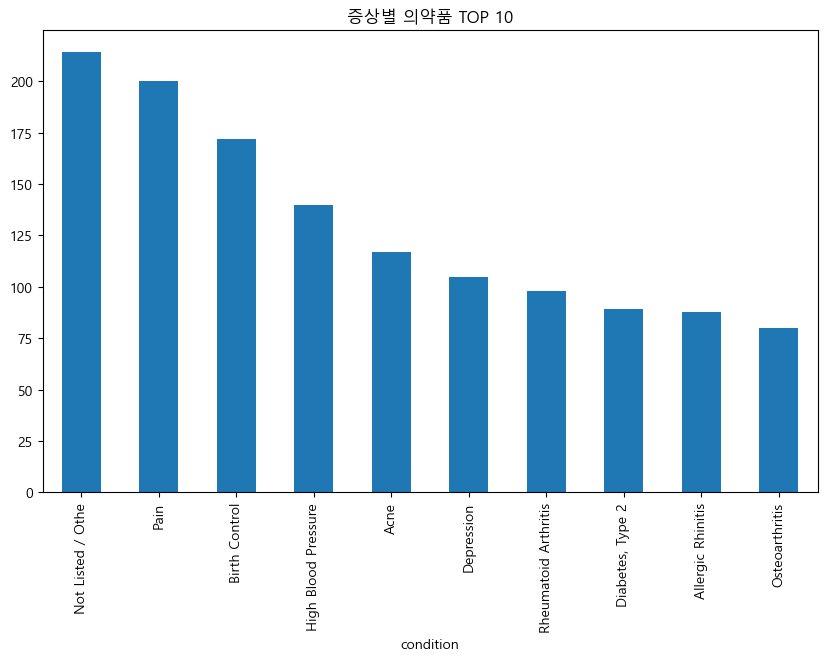

In [98]:
# 증상별 의약품 TOP 10
plt.figure(figsize=(10,6))
df_train_eda1 = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_train_eda1[0:10].plot(kind="bar")
plt.title('증상별 의약품 TOP 10')
plt.show()

- 증상별로 가장 많은 약은 '기타'를 제외한 '통증', '피임', '고혈압'순 이다.

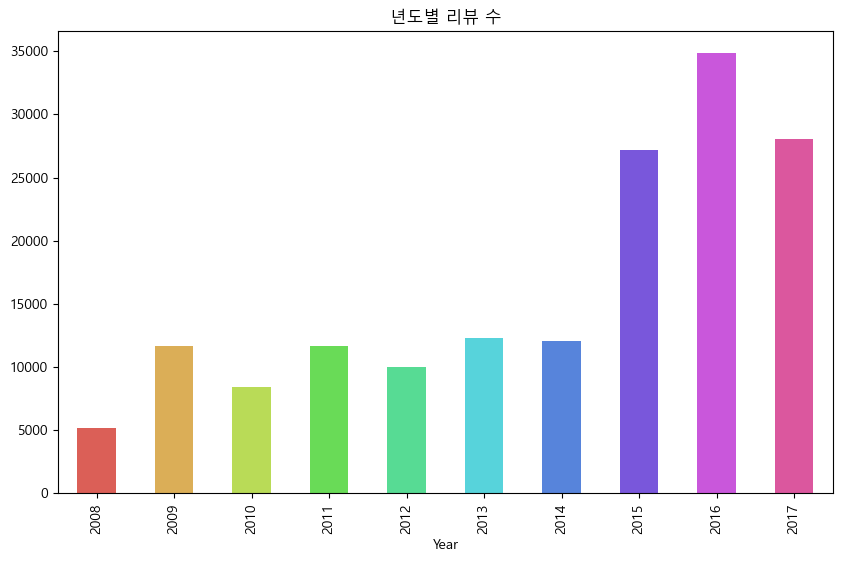

In [99]:
# 년도별 리뷰 수
df_train['YYYYMMDD'] = pd.to_datetime(df_train['date'])
df_train['Year'] = df_train['YYYYMMDD'].dt.year
df_train['month'] = df_train['YYYYMMDD'].dt.month
df_tmp = df_train.groupby('Year').size()

plt.figure(figsize=(10,6))
colors = sns.color_palette('hls',len(df_tmp))
df_tmp.plot(kind="bar", color=colors)
plt.title('년도별 리뷰 수')
plt.show()

- 2016년도의 리뷰량이 가장많다. => 가장 많이 약을 복용했다.
- 2014년 이후 리뷰의 양이 급증했다. => 메르스 발병으로 인한 복용량 증가

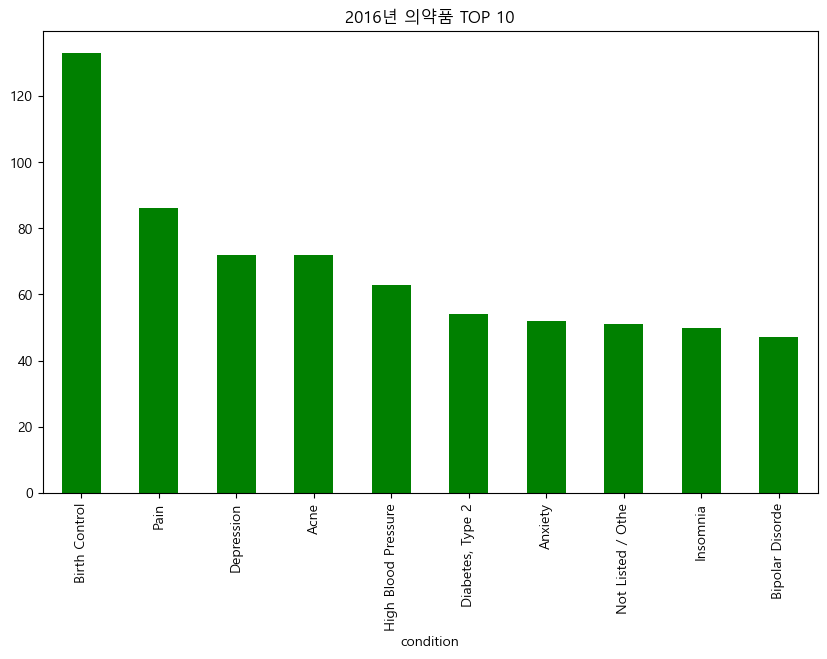

In [100]:
# 리뷰양이 가장 많은 2016년도의 의약품 TOP 10
plt.figure(figsize=(10,6))
df_train_2016 = df_train[df_train['Year'] == 2016]
df_train_2016_con = df_train_2016.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_train_2016_con[0:10].plot(kind="bar", color='green')
plt.title('2016년 의약품 TOP 10')
plt.show()

- 약 리뷰양이 가장 많았던 2016년에는 'Not Listed/Othe'가 아닌 Birth Control이 가장 많았다.

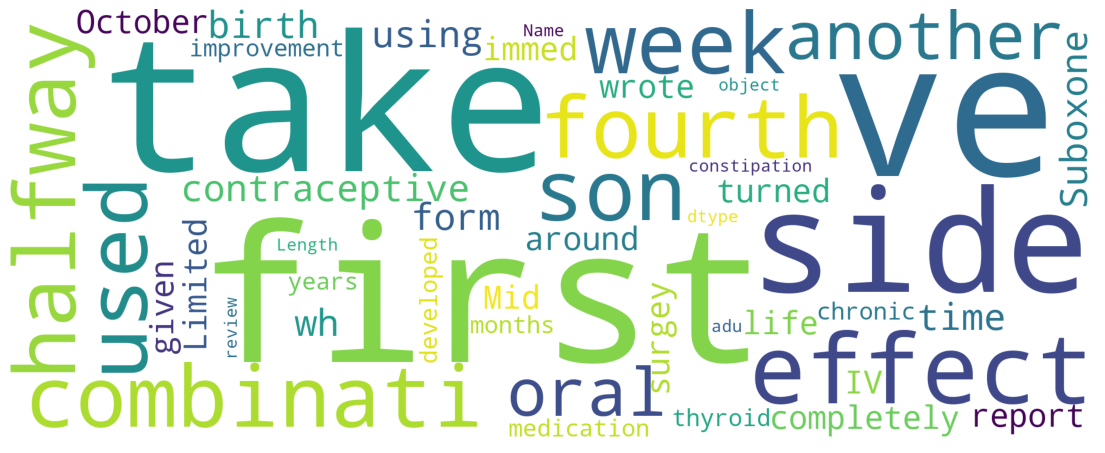

In [115]:
# 리뷰에 따른 wordcloud
from wordcloud import WordCloud, STOPWORDS

stop_words = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, width = 2000, height = 800).generate(str(df_train['review']))

plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- first : 처음 약을 복용한 사람들은 리뷰를 많이 쓰는 경향이 있다.
- side + effect : 부작용에 대한 리뷰
- son : 자식에 대한 리뷰를 부모가 작성

In [101]:
from collections import defaultdict
df_train_6_10 = df_train[df_train["rating"]>5]
df_train_1_5 = df_train[df_train["rating"]<6]

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\plotly\tools.py:460: DeprecationWarning:



plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead




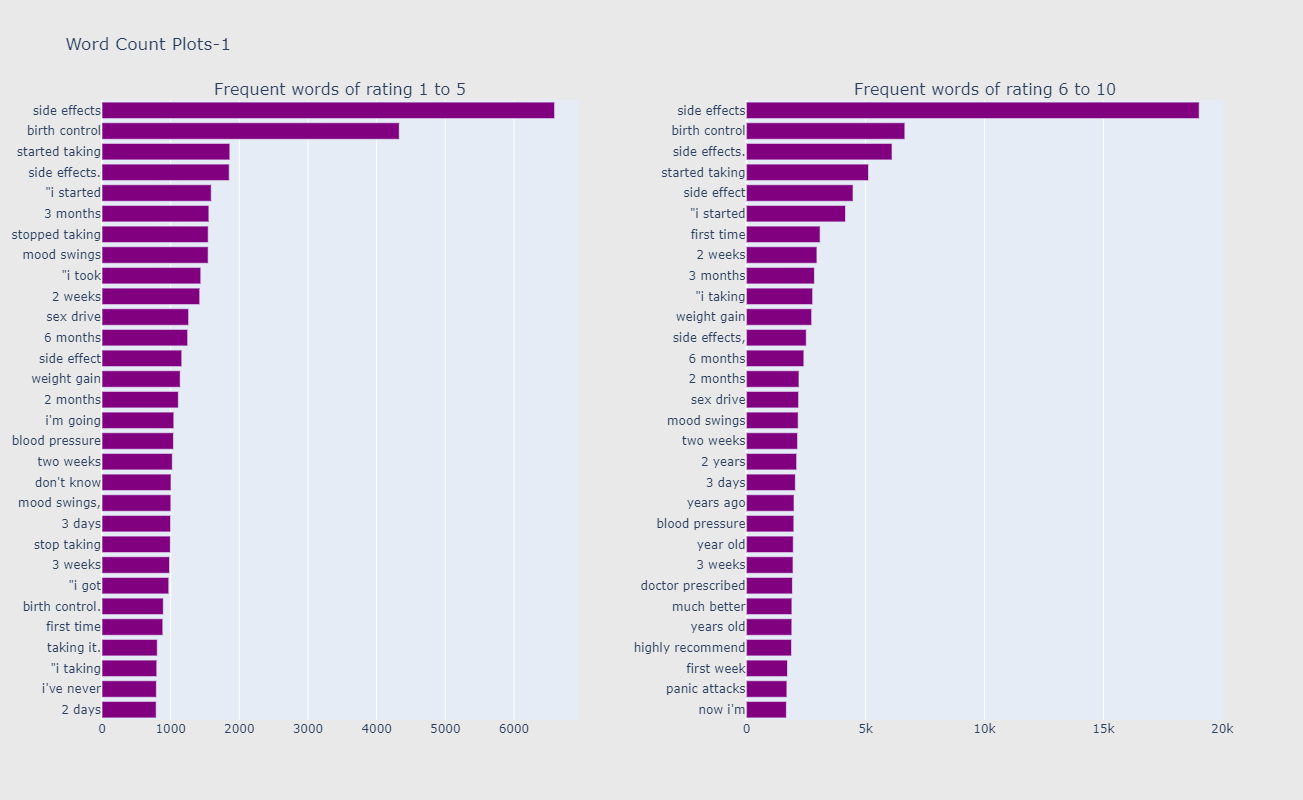

In [151]:
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

# Thanks : https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
        color=color,
        ),
    )
    return trace

freq_dict = defaultdict(int)
for sent in df_train_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'purple')

freq_dict = defaultdict(int)
for sent in df_train_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(30), 'purple')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots-1")
py.iplot(fig, filename='word-plots')

- df_train_1_5(부정)과 df_train_6_10(긍정)의 말뭉치들이 비슷하다. => 긍정과 부정의 구별이 어렵다.
- 말뭉치들을 확장해보자

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\plotly\tools.py:460: DeprecationWarning:



plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead




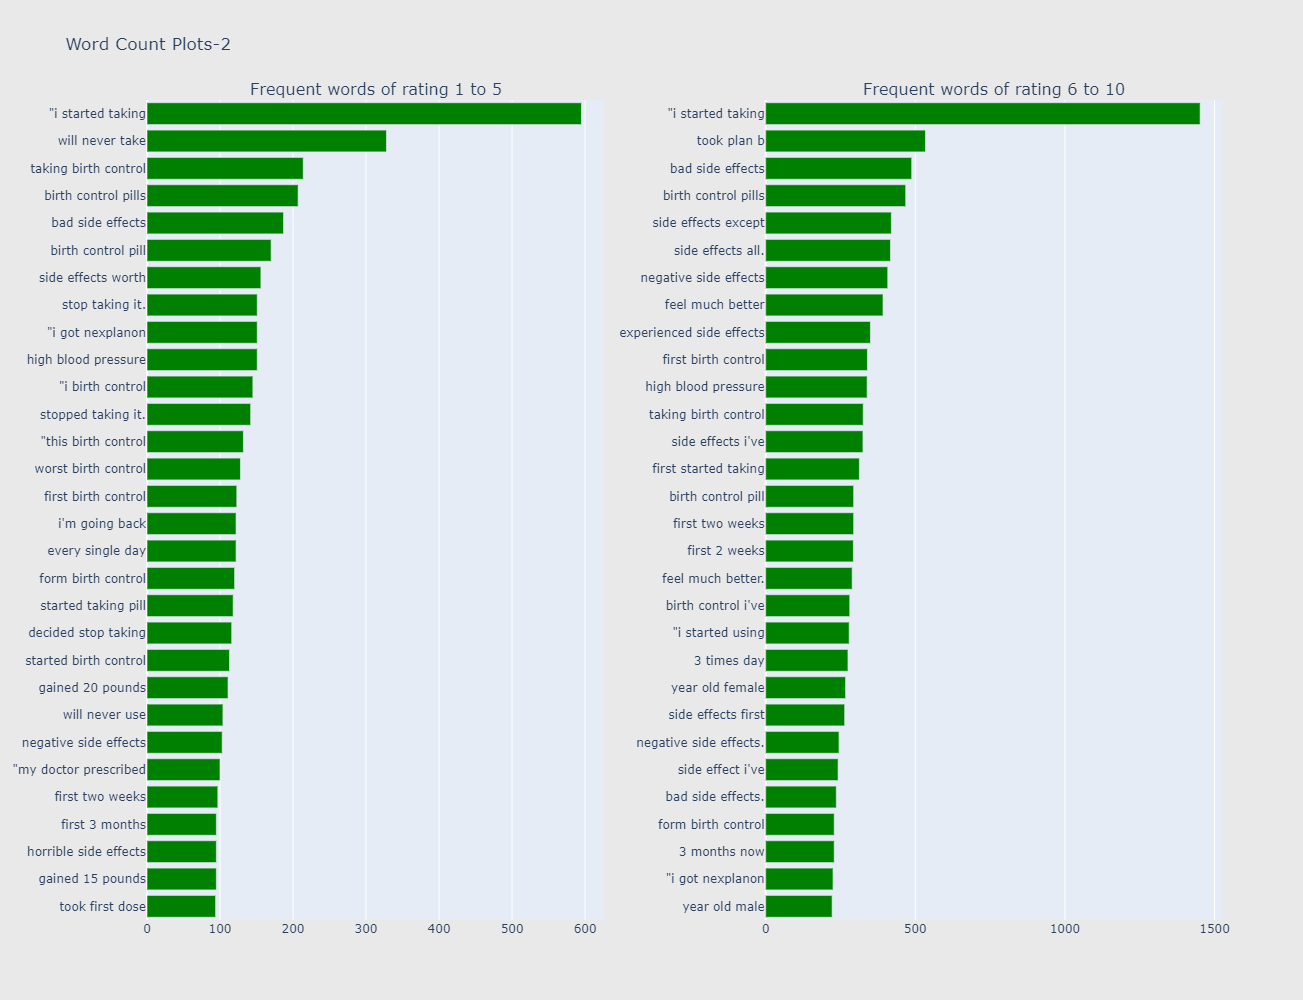

In [154]:
freq_dict = defaultdict(int)
for sent in df_train_1_5["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'green')

freq_dict = defaultdict(int)
for sent in df_train_6_10["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(30), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1000, width=1400, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots-2")
py.iplot(fig, filename='word-plots')

- 긍정과 부정 말뭉치들 사이에서 차이가 보인다. 하지만 아직도 중복되는 문장들이 존재한다.

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\plotly\tools.py:460: DeprecationWarning:



plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead




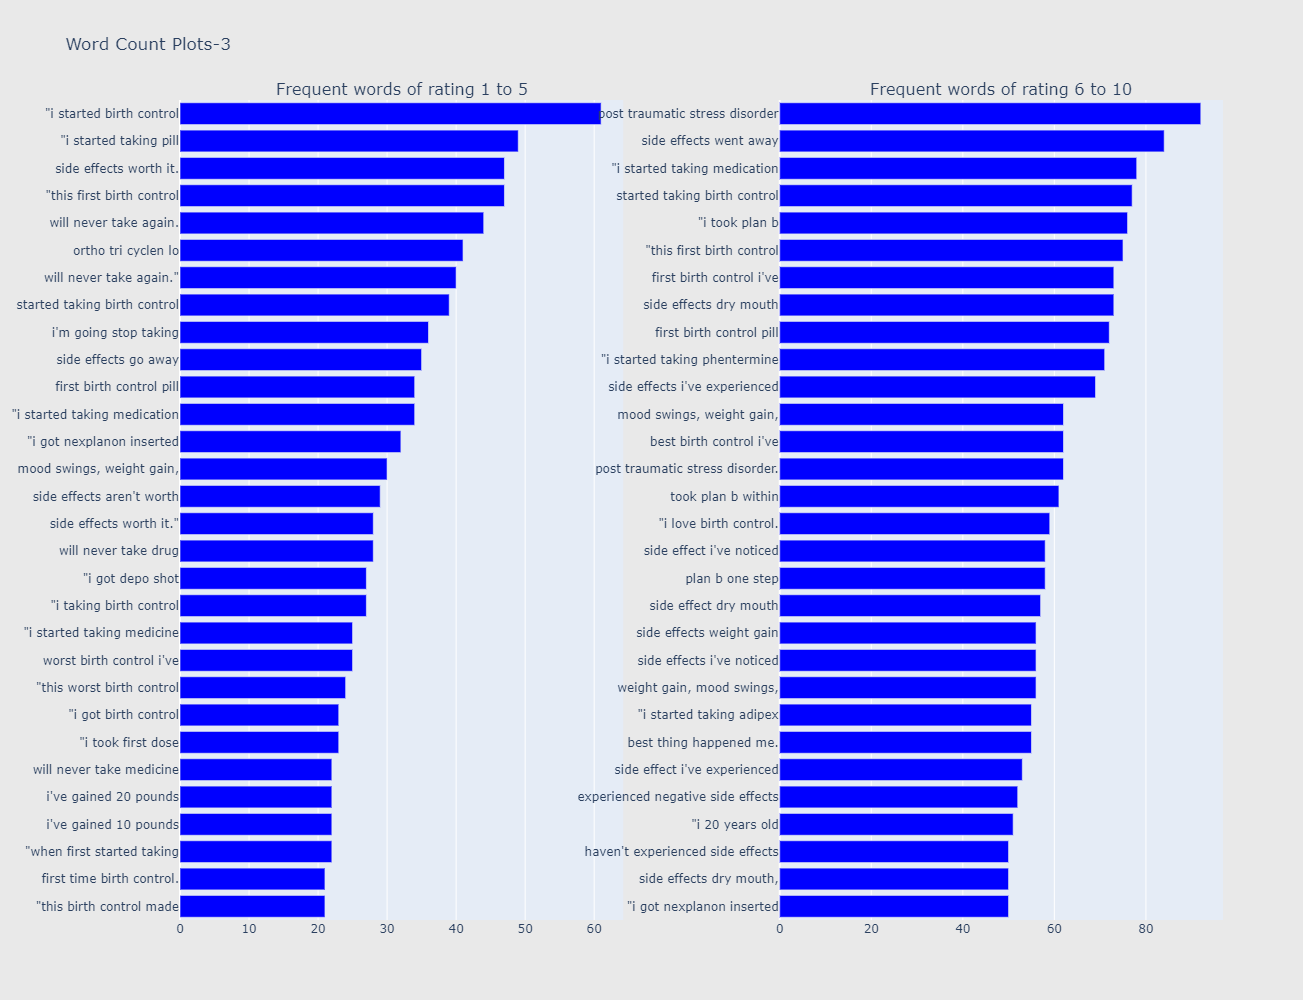

In [155]:
freq_dict = defaultdict(int)
for sent in df_train_1_5["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

freq_dict = defaultdict(int)
for sent in df_train_6_10["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1000, width=1600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots-3")
py.iplot(fig, filename='word-plots')

- 이제 긍정과 부정에서 완전한 차이를 보이고 있다. 예를들어, 같은 'side effect'단어라도 긍정에서는 'side effect went away'로 나오고, 부정에서는 'side effect worth it' 로 말뭉치가 나왔다.

In [193]:
df_ttt=df_train['rating'].value_counts().sort_values(ascending=False)
# df_ttt.sum() = 161297
df_ttt.div(161297) * 100

10    31.611871
9     17.068513
1     13.403225
8     11.711315
7      5.862477
5      4.967854
2      4.297042
3      4.037893
6      3.932497
4      3.107311
Name: rating, dtype: float64

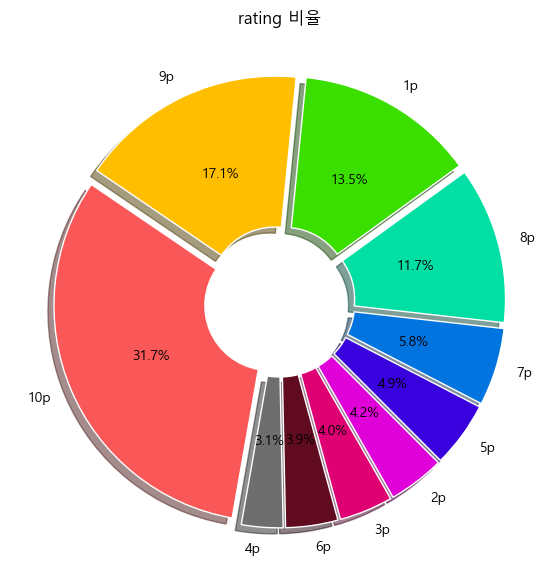

In [192]:
# rating 비율
ratio = [31.6,17.0,13.4,11.7,5.8,4.9,4.2,4.0,3.9,3.1]
labels = ['10p','9p','1p','8p','7p','5p','2p','3p','6p','4p']

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#FA5858', '#FFBF00', '#3ADF00', '#01DFA5', '#0174DF', '#3A01DF', '#DF01D7', '#DF0174', '#610B21', '#6E6E6E'] 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.figure(figsize=(7,7))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors, wedgeprops=wedgeprops)
plt.title('rating 비율')
plt.show()

- 대부분의 사람들이 높은점수를 줬고, 부정보다는 긍정의 반응이 더 많다는 것을 확인할 수 있다.

C:\Users\user\AppData\Local\Temp\ipykernel_12964\3474557501.py:2: UserWarning:







`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751






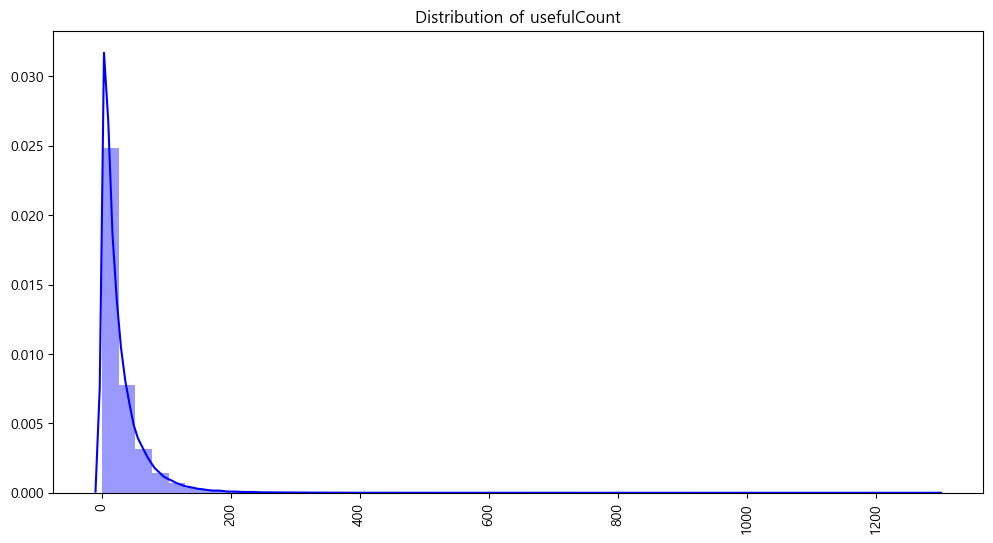

In [150]:
# Thanks : https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook
plt.figure(figsize=(12,6))
sns.distplot(df_train["usefulCount"].dropna(),color="blue")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [153]:
print('평균 :', df_train['usefulCount'].mean())
print('중앙값 :', df_train['usefulCount'].median())
print('최댓값 :', df_train['usefulCount'].max())
print('최솟값 :', df_train['usefulCount'].min())

q1 = df_train['usefulCount'].quantile(0.25)
q2 = df_train['usefulCount'].quantile(0.5)
q3 = df_train['usefulCount'].quantile(0.75)
q4 = df_train['usefulCount'].quantile(1)

iqr = q3-q1

upper_fence = q3 + (1.5*iqr)
lower_fence = q1 - (1.5*iqr)

print('upper_fence :', upper_fence)
print('lower_fence :', lower_fence )

평균 : 28.00475520313459

중앙값 : 16.0

최댓값 : 1291

최솟값 : 0

upper_fence : 81.0

lower_fence : -39.0


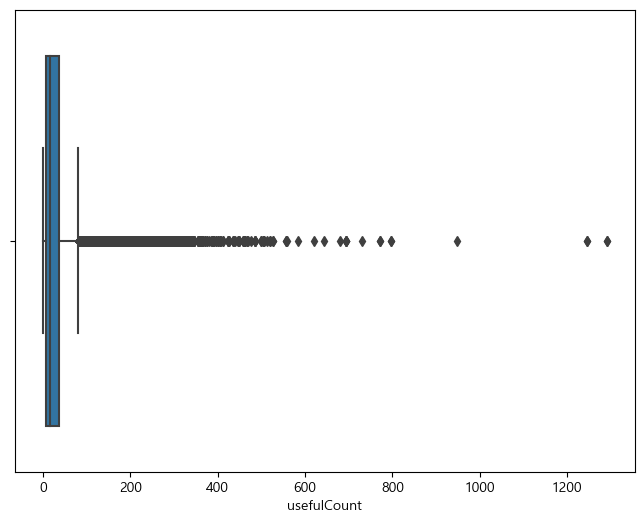

In [142]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['usefulCount'])
plt.show()

In [141]:
df_train["usefulCount"].describe()

count    161297.000000
mean         28.004755
std          36.403742
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

- 매우 많은 이상치들이 존재한다. 

=> Date Preprocessing에서 처리한다.
- 최소값과 최대값의 차이가 매우 크고, 편차또한 36으로 크게 나타났다. 그 이유는 리뷰가 좋고 나쁘고에 관계없이, 사람들이 약품을 찾아볼수록 약품의 리뷰를 보기 때문이다.

=> 모델생성시, condition에 따라 normalize를 진행한다.

---

## 3. Data Preprocessing

### 3-1. 결측치 처리

In [148]:
# 결측치 확인
df_all = pd.concat([df_train,df_test]).reset_index()
del df_all['index']
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent

condition      1194
usefulCount       0
date              0
rating            0
review            0
drugName          0
uniqueID          0
dtype: int64

In [149]:
print("condition Missing value (%):", 1194/df_all.shape[0] *100)

condition Missing value (%): 0.5551861547546533


- 결측치가 0.5%정도이므로 삭제한다.

In [150]:
# 결측치 삭제
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)

In [151]:
# 삭제 확인
df_all = pd.concat([df_train,df_test]).reset_index()
del df_all['index']
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent

usefulCount    0
date           0
rating         0
review         0
condition      0
drugName       0
uniqueID       0
dtype: int64

### 3-2. 'Condition' 전처리

In [152]:
# Thanks : https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook
# <span> 태그 삭제
all_list = set(df_all.index)
span_list = []
for i,j in enumerate(df_all['condition']):
    if '</span>' in j:
        span_list.append(i)

In [153]:
# <span> 테그 삭제 후 새 index 생성
new_idx = all_list.difference(set(span_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

### 3-3. 'review' 전처리

In [156]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

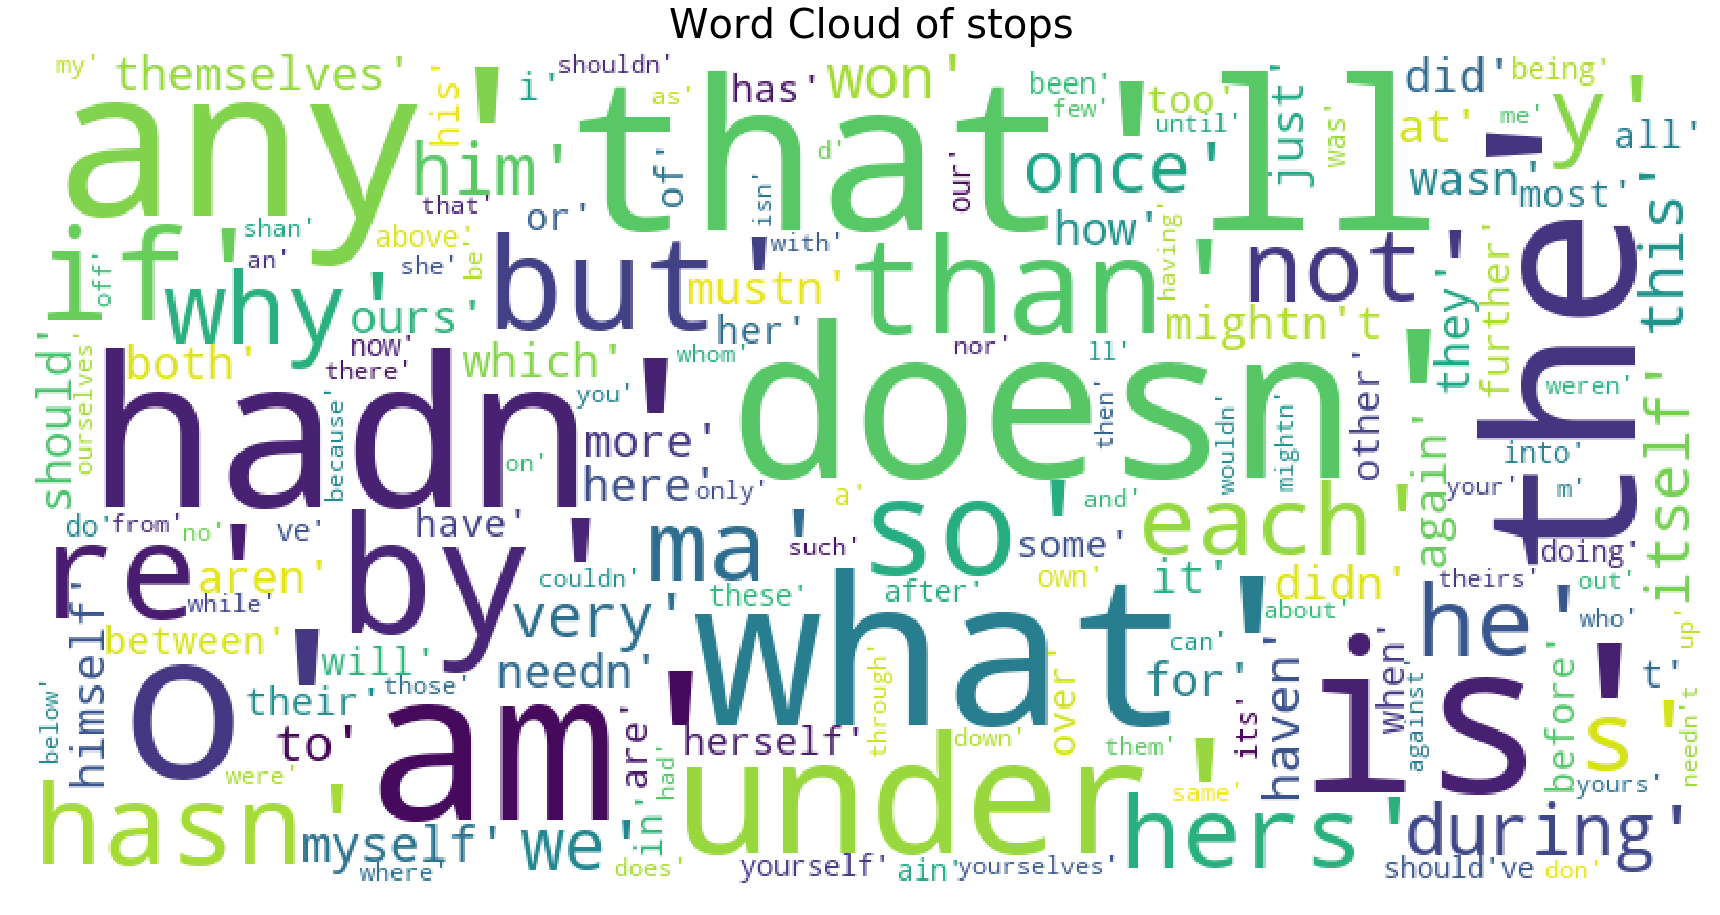

In [157]:
stops = set(stopwords.words('english'))

# Thanks : https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(stops, title="Word Cloud of stops")

- 위 불용어들을 보면 부정의 의미인 hasn't, not 등이 포함되어 있다.
- 이 단어들은 감성분석을 위한 중요한 단어들이므로, 이 단어들을 불용어에서 제거해준다.

In [158]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [159]:
# Thanks : https://www.kaggle.com/code/chocozzz/recommendation-medicines-by-using-a-review/notebook
import re
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [160]:
df_all['review_clean'] = df_all['review'].apply(review_to_words)

---

## 4. Model

### 4-1. N-gram

In [161]:
# rating system(평점 6이상 : 1 / 평점 5이하 : 0)
df_all['rating_cls'] = df_all["rating"].apply(lambda x: 1 if x > 5 else 0)

In [162]:
# 데이터 분리
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_all, test_size=0.3, random_state=1234) 
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,rating_cls
154653,207287,Valtrex,Cold Sores,"""This medicine is absolute magic! I only get a...",10,2015-12-17,29,medicin absolut magic get cold sore year like ...,1
16785,46543,Sulfasalazine,Psoriatic Arthritis,"""Been a psoriatic arthritis sufferer these las...",9,2017-03-20,14,psoriat arthriti suffer last twenti year flare...,1
32719,183836,Opium,Diarrhea,"""Paregoric is a wonderful medication. Not sure...",10,2016-01-12,6,paregor wonder medic not sure crohn diseas ib ...,1
4433,55093,Bupropion / naltrexone,Obesity,"""First Post: I got contrave from my NP a month...",10,2016-04-27,57,first post got contrav np month ago scale prog...,1
13986,223650,Epiduo Forte,Acne,"""Y&#039;ALL. This is only my 5th day on Epiduo...",5,2017-08-16,2,th day epiduo fort much insight medicin effect...,0


In [163]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(4, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- 각 단어의 빈도를 기준으로 텍스트를 벡터로 변환하기 위해 CountVectorizer 사용

In [164]:
pipeline = Pipeline([
    ('vect', vectorizer),
])
pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(4, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [165]:
train_data_features = pipeline.fit_transform(df_train['review_clean'])
test_data_features = pipeline.fit_transform(df_test['review_clean'])

In [166]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [167]:
# Thanks : https://www.kaggle.com/code/apurvasharma866/nlp-jcomp-review-3-application-1
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. y_train 생성
y_train = df_train['rating_cls']
y_test = df_test['rating_cls']
solution = y_test.copy()

# 2. Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               4000200   
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
activation_7 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_8 (Batch (None, 300)               1200      
_________________________________________________________________
activation_8 (Activation)    (None, 300)               0         
__________

Epoch 1/10
148888/148888 [==============================] - 34s 228us/step - loss: 0.5785 - acc: 0.7154
Epoch 2/10
148888/148888 [==============================] - 32s 216us/step - loss: 0.4978 - acc: 0.7603
Epoch 3/10
148888/148888 [==============================] - 32s 217us/step - loss: 0.4620 - acc: 0.7766
Epoch 4/10
148888/148888 [==============================] - 32s 214us/step - loss: 0.4422 - acc: 0.7850
Epoch 5/10
148888/148888 [==============================] - 32s 212us/step - loss: 0.4284 - acc: 0.7915
Epoch 6/10
148888/148888 [==============================] - 32s 216us/step - loss: 0.4190 - acc: 0.7954
Epoch 7/10
148888/148888 [==============================] - 32s 216us/step - loss: 0.4121 - acc: 0.7979
Epoch 8/10
148888/148888 [==============================] - 32s 213us/step - loss: 0.4055 - acc: 0.8004
Epoch 9/10
148888/148888 [==============================] - 32s 215us/step - loss: 0.4013 - acc: 0.8023
Epoch 10/10
148888/148888 [==============================] - 32s

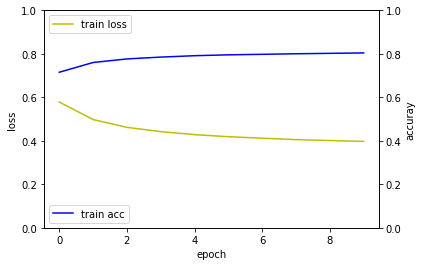

63810/63810 [==============================] - 6s 100us/step
loss_and_metrics : [1.093146445433224, 0.6409810374549444]


In [170]:
# 4. Train model
hist = model.fit(train_data_features, y_train, epochs=10, batch_size=64)

# 5. Traing process
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. Evaluation
loss_and_metrics = model.evaluate(test_data_features, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [171]:
pred1 = model.predict(test_data_features,batch_size=32)

In [172]:
for i in range(len(pred1)): 
    if(pred1[i] < 0.5): 
        pred1[i] = 0
    else: pred1[i] = 1
pred1

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [173]:
from sklearn.metrics import confusion_matrix
soln = df_test['rating_cls']
confusion_matrix(y_pred=pred1, y_true=soln)

array([[ 2650, 16487],
       [ 6422, 38251]])

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=pred1, y_true=soln, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.29      0.14      0.19     19137
          1       0.70      0.86      0.77     44673

avg / total       0.58      0.64      0.60     63810



### 4-2. Lightgbm

- 낮은 정확도 향상을 위해, 머신러닝을 사용한다.

In [176]:
import gc
len_train = df_train.shape[0]
df_all = pd.concat([df_train,df_test])
del df_train, df_test;
gc.collect() # 가비지 컬렉션 수행하여 순환참조 객체를 메모리에서 해제

9416

In [177]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['day'] = df_all['date'].dt.day
df_all['year'] = df_all['date'].dt.year
df_all['month'] = df_all['date'].dt.month

In [178]:
from textblob import TextBlob
from tqdm import tqdm
reviews = df_all['review_clean']

Predict_Opinion = []
for review in tqdm(reviews):
    blob = TextBlob(review) # 리뷰에서 TextBlob 사용
    Predict_Opinion += [blob.sentiment.polarity] # 감정 점수 가져오기
df_all["Predict_Opinion"] = Predict_Opinion
df_all.head()

100%|██████████| 212698/212698 [02:21<00:00, 1505.46it/s]


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,rating_cls,day,year,month,Predict_Opinion
154653,207287,Valtrex,Cold Sores,"""This medicine is absolute magic! I only get a...",10,2015-12-17,29,medicin absolut magic get cold sore year like ...,1,17,2015,12,-0.272222
16785,46543,Sulfasalazine,Psoriatic Arthritis,"""Been a psoriatic arthritis sufferer these las...",9,2017-03-20,14,psoriat arthriti suffer last twenti year flare...,1,20,2017,3,0.003788
32719,183836,Opium,Diarrhea,"""Paregoric is a wonderful medication. Not sure...",10,2016-01-12,6,paregor wonder medic not sure crohn diseas ib ...,1,12,2016,1,0.112500
4433,55093,Bupropion / naltrexone,Obesity,"""First Post: I got contrave from my NP a month...",10,2016-04-27,57,first post got contrav np month ago scale prog...,1,27,2016,4,0.107143
13986,223650,Epiduo Forte,Acne,"""Y&#039;ALL. This is only my 5th day on Epiduo...",5,2017-08-16,2,th day epiduo fort much insight medicin effect...,0,16,2017,8,-0.066667


In [179]:
# 피어슨 상관계
np.corrcoef(df_all["Predict_Opinion"], df_all["rating"])

array([[1.        , 0.25684042],
       [0.25684042, 1.        ]])

In [180]:
np.corrcoef(df_all["Predict_Opinion"], df_all["rating_cls"])

array([[1.        , 0.23506826],
       [0.23506826, 1.        ]])

In [181]:
reviews = df_all['review']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
df_all["Predict_Opinion2"] = Predict_Sentiment

100%|██████████| 212698/212698 [03:44<00:00, 948.02it/s] 


In [182]:
np.corrcoef(df_all["Predict_Opinion2"], df_all["rating"])

array([[1.        , 0.34821039],
       [0.34821039, 1.        ]])

In [183]:
np.corrcoef(df_all["Predict_Opinion2"], df_all["rating_cls"])

array([[1.        , 0.31714185],
       [0.31714185, 1.        ]])

In [184]:
#문장길이 (줄바꿈표시가 몇번나왔는지 셈)
df_all['count_sent']=df_all["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:(단어갯수)
df_all['count_word']=df_all["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count(unique한 단어 갯수)
df_all['count_unique_word']=df_all["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count(리뷰길이)
df_all['count_letters']=df_all["review_clean"].apply(lambda x: len(str(x)))

#punctuation count(특수문자)
df_all["count_punctuations"] = df_all["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count(전부다 대문자인 단어 갯수)
df_all["count_words_upper"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count(첫글자가 대문자인 단어 갯수)
df_all["count_words_title"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords(불용어 갯수)
df_all["count_stopwords"] = df_all["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the words(평균단어길이)
df_all["mean_word_len"] = df_all["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [185]:
# 'season' 변수 추가
df_all['season'] = df_all["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

In [186]:
# useful_count normalize
df_train = df_all[:len_train]
df_test = df_all[len_train:]

In [187]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

#folds = KFold(n_splits=5, shuffle=True, random_state=546789)
target = df_train['rating_cls']
feats = ['usefulCount','day','year','month','Predict_Opinion','Predict_Opinion2', 'count_sent',
 'count_word', 'count_unique_word', 'count_letters', 'count_punctuations',
 'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len', 'season']

sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 
    
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

pred2 = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.482625	valid_1's binary_logloss: 0.495091
[200]	training's binary_logloss: 0.465396	valid_1's binary_logloss: 0.490156
[300]	training's binary_logloss: 0.449749	valid_1's binary_logloss: 0.485599
[400]	training's binary_logloss: 0.436139	valid_1's binary_logloss: 0.481397
[500]	training's binary_logloss: 0.423164	valid_1's binary_logloss: 0.477622
[600]	training's binary_logloss: 0.411447	valid_1's binary_logloss: 0.474218
[700]	training's binary_logloss: 0.40015	valid_1's binary_logloss: 0.470536
[800]	training's binary_logloss: 0.389587	valid_1's binary_logloss: 0.467547
[900]	training's binary_logloss: 0.379778	valid_1's binary_logloss: 0.464175
[1000]	training's binary_logloss: 0.370196	valid_1's binary_logloss: 0.460944
[1100]	training's binary_logloss: 0.360624	valid_1's binary_logloss: 0.457842
[1200]	training's binary_logloss: 0.351539	valid_1's binary_logloss: 0.455273
[1300]	trai

In [188]:
confusion_matrix(y_pred=pred2, y_true=solution)

array([[12788,  6349],
       [ 3283, 41390]])

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=pred2, y_true=solution, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.80      0.67      0.73     19137
          1       0.87      0.93      0.90     44673

avg / total       0.85      0.85      0.84     63810



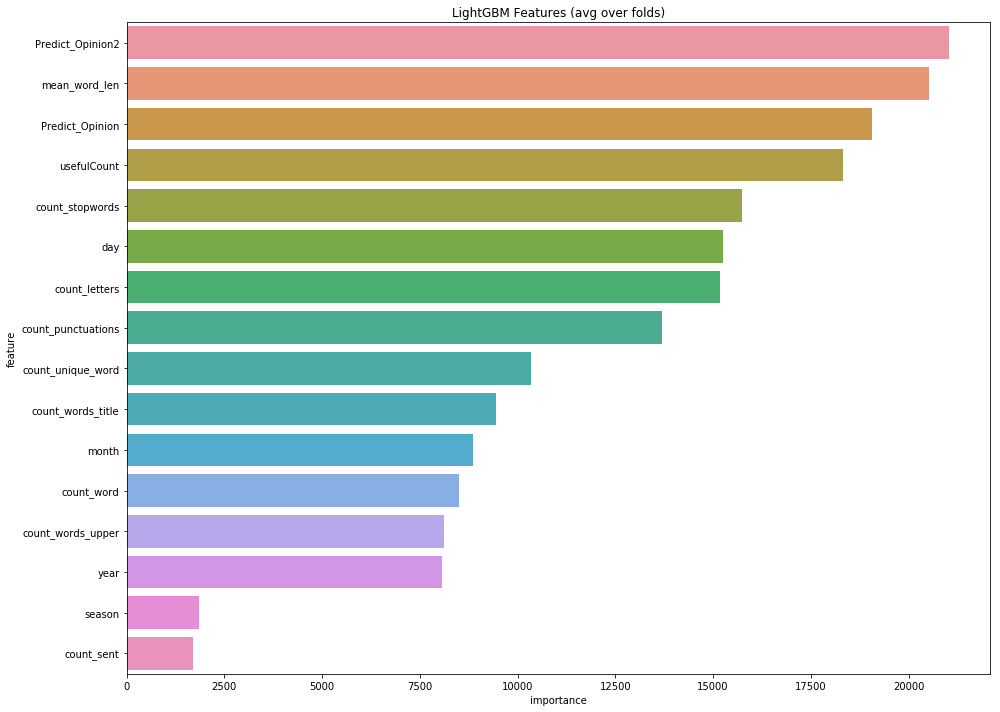

In [190]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

- 하버드 감정 사전을 활용한 추가 감정 분석을 진행

In [191]:
# import dictionary data
word_table = pd.read_csv("../input/dictionary/inquirerbasic.csv")

# word_table = pd.read_csv("inquirerbasic.csv")

In [192]:
word_table.head()

,Entry,Source,Positiv,Negativ
0,A,H4Lvd,NaN,NaN
1,ABANDON,H4Lvd,NaN,Negativ
2,ABANDONMENT,H4,NaN,Negativ
3,ABATE,H4Lvd,NaN,Negativ
4,ABATEMENT,Lvd,NaN,NaN


In [193]:
##1. make list of sentiment
#Positiv word list   
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
len(temp_Positiv)
len(Positiv_word_list)  #del temp_Positiv

#Negativ word list          
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
len(temp_Negativ)
len(Negativ_word_list)  #del temp_Negativ

2006

In [194]:
##2. counting the word 98590
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

- 사전에 포함되어있는 'review_clean' 단어개수 count

In [195]:
##3. decide sentiment
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,rating_cls,day,year,month,Predict_Opinion,Predict_Opinion2,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
55020,21664,Pitavastatin,High Cholesterol,"""I&#039;m sensitive to statin drugs. Have tol...",8,2012-10-26,83,sensit statin drug toler livalo well mos start...,1,26,2012,10,-0.175000,-0.050000,1,38,33,219,23,5,9,33,4.789474,3,3.0,2.0,0.6,1.0
202566,231967,Trazodone,Insomnia,"""It worked very well in making me stay asleep ...",5,2010-09-17,36,work well make stay asleep gave stuffi nose tr...,0,17,2010,9,0.100000,0.050000,1,22,17,127,7,4,6,21,4.818182,3,NaN,NaN,NaN,0.5
102881,32248,Lisinopril,High Blood Pressure,"""After a week of taking Lisinopril, I started ...",1,2017-06-27,32,week take lisinopril start cough product cough...,0,27,2017,6,-0.055000,-0.048810,1,70,44,440,17,9,18,61,5.300000,2,NaN,NaN,NaN,0.5
153650,221818,Methamphetamine,ADHD,"""Works well and lasts very long. This is so sm...",9,2016-09-13,6,work well last long smooth no idea not use rea...,1,13,2016,9,-0.021667,0.075333,1,20,20,96,10,1,5,18,3.850000,3,NaN,NaN,NaN,0.5
168218,74823,Keppra,Seizures,"""After a stroke in 2005 I had seizures until ...",10,2016-02-03,30,stroke seizur start keppra mg bid twice day bo...,1,3,2016,2,0.166667,0.121429,1,21,19,131,21,2,6,29,5.285714,4,NaN,NaN,NaN,0.5


- Positiv_ratio가 0.5이상이면 긍정, 0.5이하이면 부정으로 분류한다.

In [196]:
def userful_count(data):
    grouped = data.groupby(['condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='condition',how='left')
    return data

df_test =  userful_count(df_test) 
df_test['usefulCount'] = df_test['usefulCount']/df_test['user_size']

- usefulCount가 condition에 의존하여 편향을 보이기 때문에 normalize를 시켰다.
- 3개의 결과변수(deep_pred, machine_pred, sentiment_by_dic)를 더한 후 usefulCount를 곱해준다.

In [197]:
#review_clean => rating = pred1
# review(words) => rating = pred2
# Positiv_ratio => 0.5 이상 = sentiment_by_dic

df_test['deep_pred'] = pred1
df_test['machine_pred'] = pred2

df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic'])*df_test['usefulCount']

In [198]:
df_test_group = df_test.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})
df_test_group

total_pred
                                                                              mean
condition                 drugName                                                
ADHD                      Adderall                                        0.072170
                          Adderall XR                                     0.050278
                          Adzenys XR-ODT                                  0.008862
                          Amphetamine                                     0.013433
                          Amphetamine / dextroamphetamine                 0.050169
                          Aptensio XR                                     0.022388
                          Armodafinil                                     0.027472
                          Atomoxetine                                     0.056326
                          Bupropion                                       0.126604
                          Catapres                                        0.055410
                          Clonidine                                       0.096031
                          Concerta                                        0.061683
                          Cylert                                          0.026119
                          Daytrana                                        0.037137
                          Desoxyn                                         0.186847
                          Dexedrine                                       0.067164
                          Dexmethylphenidate                              0.054198
                          Dextroamphetamine                               0.061007
                          Dyanavel XR                                     0.023756
                          Evekeo                                          0.023694
                          Focalin                                         0.076144
                          Focalin XR                                      0.050344
                          Guanfacine                                      0.090489
                          Intuniv                                         0.111297
                          Kapvay                                          0.109888
                          Lisdexamfetamine                                0.058130
                          Metadate CD                                     0.048943
                          Methamphetamine                                 0.071482
                          Methylin                                        0.044776
                          Methylin ER                                     0.023694
...                                                                            ...
ibromyalgia               Trazodone                                       0.051379
                          Ultram                                          0.100552
                          Ultram ER                                       0.182759
                          Venlafaxine                                     0.152046
                          Xyrem                                           0.262069
lic Acid Deficiency       Deplin                                         37.333333
                          L-methylfolate                                 18.750000
mance Anxiety             Propranolol                                     1.120961
min / pioglitazone)       Metformin / pioglitazone                       19.625000
min / rosiglitazone)      Metformin / rosiglitazone                      10.000000
min / saxagliptin)        Metformin / saxagliptin                         8.062500
min / sitagliptin)        Metformin / sitagliptin                         8.750000
min)                      Dapagliflozin / metformin                       5.400000
                          Empagliflozin / metformin                       1.250000
                          Linagliptin / metformin                         0.431250
     

## 5. 추천 시스템

증상(condition)과 리뷰(review)를 활용한 추천

In [410]:
# 증상(condition)과 리뷰(review)를 활용한 추천
def recommend_system(condition, review):
    print('Top 10 drug for {} (based on your condition & review)'.format(condition))
    condition_name = df_test[df_test['condition'] == condition]
    condition_value = condition_name[['condition', 'drugName', 'review_clean', 'total_pred']]
    condition_dataframe = condition_value.sort_values('total_pred', ascending=False)
    
    review_name = condition_dataframe[condition_dataframe['review_clean'].str.contains(review)]
    review_value = review_name[['condition', 'drugName', 'review_clean', 'total_pred']]
    review_dataframe = review_value.sort_values('total_pred', ascending=False)
    review_top10 = review_dataframe.iloc[0:10]
    
    return review_top10

In [416]:
recommend_system('Insomnia', 'difficulti sleep')

Top 10 drug for Insomnia (based on your condition & review)


,condition,drugName,review_clean,total_pred
20600,Insomnia,Ativan,chronic pain difficulti sleep mani year use se...,0.276999
48872,Insomnia,Doxepin,zopiclon year success ween difficulti sleep do...,0.159537
59154,Insomnia,Doxepin,difficulti sleep nite sleep first night next d...,0.050842


In [417]:
recommend_system('High Cholesterol', 'sensit statin')

Top 10 drug for High Cholesterol (based on your condition & review)


,condition,drugName,review_clean,total_pred
0,High Cholesterol,Pitavastatin,sensit statin drug toler livalo well mos start...,0.976471
34859,High Cholesterol,Ezetimibe,prescrib drug liver decid go show sensit stati...,0.200000
